# Titanic Dataset

In [1]:
import pandas as pd
import numpy as np

titanic_data = pd.read_csv('Titanic Dataset.csv')

titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [3]:
titanic_data.shape

(1309, 14)

## Treat Nan's

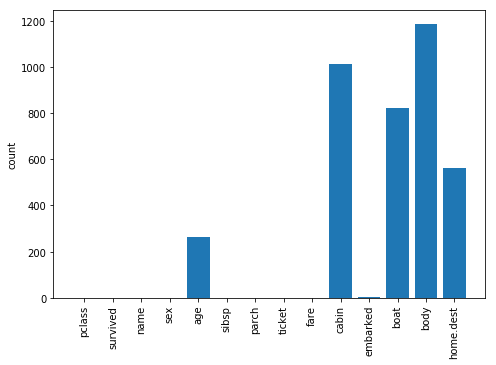

In [4]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
import matplotlib.pyplot as plt

null_data = titanic_data.isna().sum()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# set Y axis label
ax.set_ylabel('count')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
ax.bar(titanic_data.columns, null_data)
plt.show()

We can see that age isn't particularly that high of cases, so, we can just insert the mean value of age according if the passenger's cabin, as it is good categorical variable to apply.

In [9]:
# Pclass can only be 1,2 and 3.

x = titanic_data.loc[(titanic_data['age'].notnull()) & (titanic_data['pclass'] == 1),'age'].mean()
titanic_data.loc[(titanic_data['age'].isnull()) & (titanic_data['pclass'] == 1),'age'] = x
x = titanic_data.loc[(titanic_data['age'].notnull()) & (titanic_data['pclass'] == 2),'age'].mean()
titanic_data.loc[(titanic_data['age'].isnull()) & (titanic_data['pclass'] == 2),'age'] = x
x = titanic_data.loc[(titanic_data['age'].notnull()) & (titanic_data['pclass'] == 3),'age'].mean()
titanic_data.loc[(titanic_data['age'].isnull()) & (titanic_data['pclass'] == 3),'age'] = x

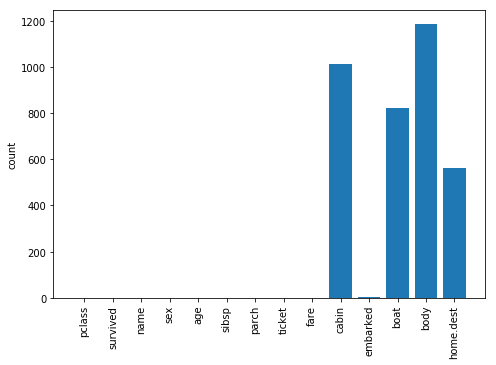

In [8]:
null_data = titanic_data.isna().sum()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# set Y axis label
ax.set_ylabel('count')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
ax.bar(titanic_data.columns, null_data)
plt.show()

The number of NA values in "Cabin", "Boat", "Body", "home.dest" are pretty high.

The Boat and Body are columns that are based categorical in our target variable "survived". 
Boat -> If the passenger survived, which boat was he in.
Body -> If the passenger not survived, which number he had on his body if found.

As you can see, this variables are based if the passenger survived or not. So, it makes sense to drop these two columns due to the purpose of the problem.